## Frailty Index
### By Gavin Qu - April 28th 2024
#### Data Extraction
First we extract the age, disdif, pidp, and the deceased variable

In [1]:
import pandas as pd
import numpy as np
import pyreadstat

In [4]:
death_df, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/xhhrel.dta")

#### Step 1 + 2: we can also skip the previous 2 and combine them into this chunk

In [28]:
import pandas as pd
import pyreadstat

# List to store DataFrames
dfs_disdif = []
dfs_age = []

# List of wave identifiers
waves = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

# Columns of interest
disdif_columns = [f'{chr(97 + i)}_disdif{j}' for i in range(13) for j in range(1, 13)]
age_columns = [f'{chr(97 + i)}_age_dv' for i in range(13)]

# Loop through waves
for wave in waves:
    # File path
    file_path = f"/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/{wave}_indresp.dta"
    
    # Read data
    data, meta = pyreadstat.read_dta(file_path, encoding="iso-8859-1")
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Select relevant columns for disdif and age
    df_subset_disdif = df[['pidp'] + [f'{wave}_disdif{i+1}' for i in range(12)]]
    df_subset_age = df[['pidp'] + [f'{wave}_age_dv']]
    
    # Rename disdif columns
    df_subset_disdif.rename(columns={f'{wave}_disdif{i+1}': f'{wave}_disdif{i+1}' for i in range(12)}, inplace=True)
    
    # Rename age column
    df_subset_age.rename(columns={f'{wave}_age_dv': 'age'}, inplace=True)
    
    # Add wave column
    df_subset_disdif['wave'] = wave
    df_subset_age['wave'] = wave
    
    # Add DataFrames to lists
    dfs_disdif.append(df_subset_disdif)
    dfs_age.append(df_subset_age)

# Concatenate DataFrames
df_long_panel_disdif = pd.concat(dfs_disdif, ignore_index=True)
df_long_panel_age = pd.concat(dfs_age, ignore_index=True)

# Merge DataFrames on pidp and wave
df_long_panel = pd.merge(df_long_panel_disdif, df_long_panel_age, on=['pidp', 'wave'], how='inner')

# Reorder columns
df_long_panel = df_long_panel[['pidp', 'wave', 'age'] + [col for col in df_long_panel.columns if col not in ['pidp', 'wave', 'age']]]

# Display the merged DataFrame
print(df_long_panel)

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96630/1521393931.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_disdif.rename(columns={f'{wave}_disdif{i+1}': f'{wave}_disdif{i+1}' for i in range(12)}, inplace=True)
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96630/1521393931.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_age.rename(columns={f'{wave}_age_dv': 'age'}, inplace=True)
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96630/1521393931.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

              pidp wave  age  a_disdif1  a_disdif2  a_disdif3  a_disdif4  \
0         68001367    a   39       -8.0       -8.0       -8.0       -8.0   
1         68004087    a   59       -8.0       -8.0       -8.0       -8.0   
2         68006127    a   39        0.0        0.0        0.0        1.0   
3         68006135    a   17       -8.0       -8.0       -8.0       -8.0   
4         68006807    a   72        1.0        1.0        0.0        0.0   
...            ...  ...  ...        ...        ...        ...        ...   
533471  1653059650    m   66        NaN        NaN        NaN        NaN   
533472  1653059690    m   59        NaN        NaN        NaN        NaN   
533473  1653134530    m   22        NaN        NaN        NaN        NaN   
533474  1653134570    m   20        NaN        NaN        NaN        NaN   
533475  1653277250    m   43        NaN        NaN        NaN        NaN   

        a_disdif5  a_disdif6  a_disdif7  ...  m_disdif3  m_disdif4  m_disdif5  \
0     

#### Binary Encoding for disdif variables 

In [29]:
# Binary encoding for disdif variables
df_long_panel.iloc[:, 3:] = df_long_panel.iloc[:, 3:].fillna(0).applymap(lambda x: 1 if x == 1 else 0)

# Display the modified DataFrame
print(df_long_panel)

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96630/2230501247.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_long_panel.iloc[:, 3:] = df_long_panel.iloc[:, 3:].fillna(0).applymap(lambda x: 1 if x == 1 else 0)


              pidp wave  age  a_disdif1  a_disdif2  a_disdif3  a_disdif4  \
0         68001367    a   39        0.0        0.0        0.0        0.0   
1         68004087    a   59        0.0        0.0        0.0        0.0   
2         68006127    a   39        0.0        0.0        0.0        1.0   
3         68006135    a   17        0.0        0.0        0.0        0.0   
4         68006807    a   72        1.0        1.0        0.0        0.0   
...            ...  ...  ...        ...        ...        ...        ...   
533471  1653059650    m   66        0.0        0.0        0.0        0.0   
533472  1653059690    m   59        0.0        0.0        0.0        0.0   
533473  1653134530    m   22        0.0        0.0        0.0        0.0   
533474  1653134570    m   20        0.0        0.0        0.0        0.0   
533475  1653277250    m   43        0.0        0.0        0.0        0.0   

        a_disdif5  a_disdif6  a_disdif7  ...  m_disdif3  m_disdif4  m_disdif5  \
0     

In [30]:
# Summary statistics for each variable
summary_stats = df_long_panel.describe()

# Display summary statistics
print(summary_stats)


               pidp            age      a_disdif1      a_disdif2  \
count  5.334760e+05  533476.000000  533476.000000  533476.000000   
mean   7.791696e+08      48.136773       0.011598       0.013854   
std    4.651655e+08      18.700820       0.107066       0.116887   
min    2.244500e+04      -9.000000       0.000000       0.000000   
25%    4.080871e+08      33.000000       0.000000       0.000000   
50%    7.483971e+08      48.000000       0.000000       0.000000   
75%    1.157270e+09      63.000000       0.000000       0.000000   
max    1.653277e+09     104.000000       1.000000       1.000000   

           a_disdif3      a_disdif4      a_disdif5      a_disdif6  \
count  533476.000000  533476.000000  533476.000000  533476.000000   
mean        0.004996       0.003076       0.003024       0.002703   
std         0.070502       0.055377       0.054904       0.051920   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

#### Add death statistics to the panel

In [33]:
# Read the death variable from the xhhrel.dta file
death_data, _ = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/xhhrel.dta", encoding="iso-8859-1")
death_df = pd.DataFrame(death_data)

# Select relevant columns (pidp and death variable)
df_death = death_df[['pidp', 'dcsedfl_dv']]

# Merge the death variable with the existing DataFrame on 'pidp'
df_long_panel = pd.merge(df_long_panel, df_death, on='pidp', how='left')

# Fill NaN values in the death variable with 0 (assuming NaN means alive)
df_long_panel['dcsedfl_dv'].fillna(0, inplace=True)

# Convert death variable to binary (1 for death, 0 for alive)
df_long_panel['dcsedfl_dv'] = df_long_panel['dcsedfl_dv'].apply(lambda x: 1 if x == 1 else 0)

# Display the updated DataFrame
print(df_long_panel)

              pidp wave  age  a_disdif1  a_disdif2  a_disdif3  a_disdif4  \
0         68001367    a   39        0.0        0.0        0.0        0.0   
1         68004087    a   59        0.0        0.0        0.0        0.0   
2         68006127    a   39        0.0        0.0        0.0        1.0   
3         68006135    a   17        0.0        0.0        0.0        0.0   
4         68006807    a   72        1.0        1.0        0.0        0.0   
...            ...  ...  ...        ...        ...        ...        ...   
533471  1653059650    m   66        0.0        0.0        0.0        0.0   
533472  1653059690    m   59        0.0        0.0        0.0        0.0   
533473  1653134530    m   22        0.0        0.0        0.0        0.0   
533474  1653134570    m   20        0.0        0.0        0.0        0.0   
533475  1653277250    m   43        0.0        0.0        0.0        0.0   

        a_disdif5  a_disdif6  a_disdif7  ...  m_disdif4  m_disdif5  m_disdif6  \
0     

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96630/3383671499.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_long_panel['dcsedfl_dv'].fillna(0, inplace=True)


#### Contruct a frailty index without weights 

In [36]:
# Calculate ratio of disdif variables equal to 1 by the total number of disdif variables
df_long_panel['frailty'] = df_long_panel.iloc[:, 3:].sum(axis=1) / 156

# Normalize the frailty values between 0 and 1
df_long_panel['frailty'] = (df_long_panel['frailty'] - df_long_panel['frailty'].min()) / (df_long_panel['frailty'].max() - df_long_panel['frailty'].min())

# Override frailty variable as 1 if dcsedfl_dv is 1
df_long_panel.loc[df_long_panel['dcsedfl_dv'] == 1, 'frailty'] = 1

# Display the updated DataFrame
print(df_long_panel)

              pidp wave  age  a_disdif1  a_disdif2  a_disdif3  a_disdif4  \
0         68001367    a   39        0.0        0.0        0.0        0.0   
1         68004087    a   59        0.0        0.0        0.0        0.0   
2         68006127    a   39        0.0        0.0        0.0        1.0   
3         68006135    a   17        0.0        0.0        0.0        0.0   
4         68006807    a   72        1.0        1.0        0.0        0.0   
...            ...  ...  ...        ...        ...        ...        ...   
533471  1653059650    m   66        0.0        0.0        0.0        0.0   
533472  1653059690    m   59        0.0        0.0        0.0        0.0   
533473  1653134530    m   22        0.0        0.0        0.0        0.0   
533474  1653134570    m   20        0.0        0.0        0.0        0.0   
533475  1653277250    m   43        0.0        0.0        0.0        0.0   

        a_disdif5  a_disdif6  a_disdif7  ...  m_disdif5  m_disdif6  m_disdif7  \
0     

In [42]:
# Summary statistics of the frailty column
frailty_stats = df_long_panel['frailty'].describe()

# Display summary statistics
print(frailty_stats)

# Count the number of rows where frailty is not equal to 0
num_non_zero_frailty = (df_long_panel['frailty'] != 0).sum()

# Print the number of rows
print("Number of rows where frailty is not equal to 0:", num_non_zero_frailty)


count    533476.000000
mean          0.081304
std           0.216114
min           0.000000
25%           0.000000
50%           0.000000
75%           0.076923
max           1.000000
Name: frailty, dtype: float64
Number of rows where frailty is not equal to 0: 136545


#### Check for 50 plus in age against positive frailty number

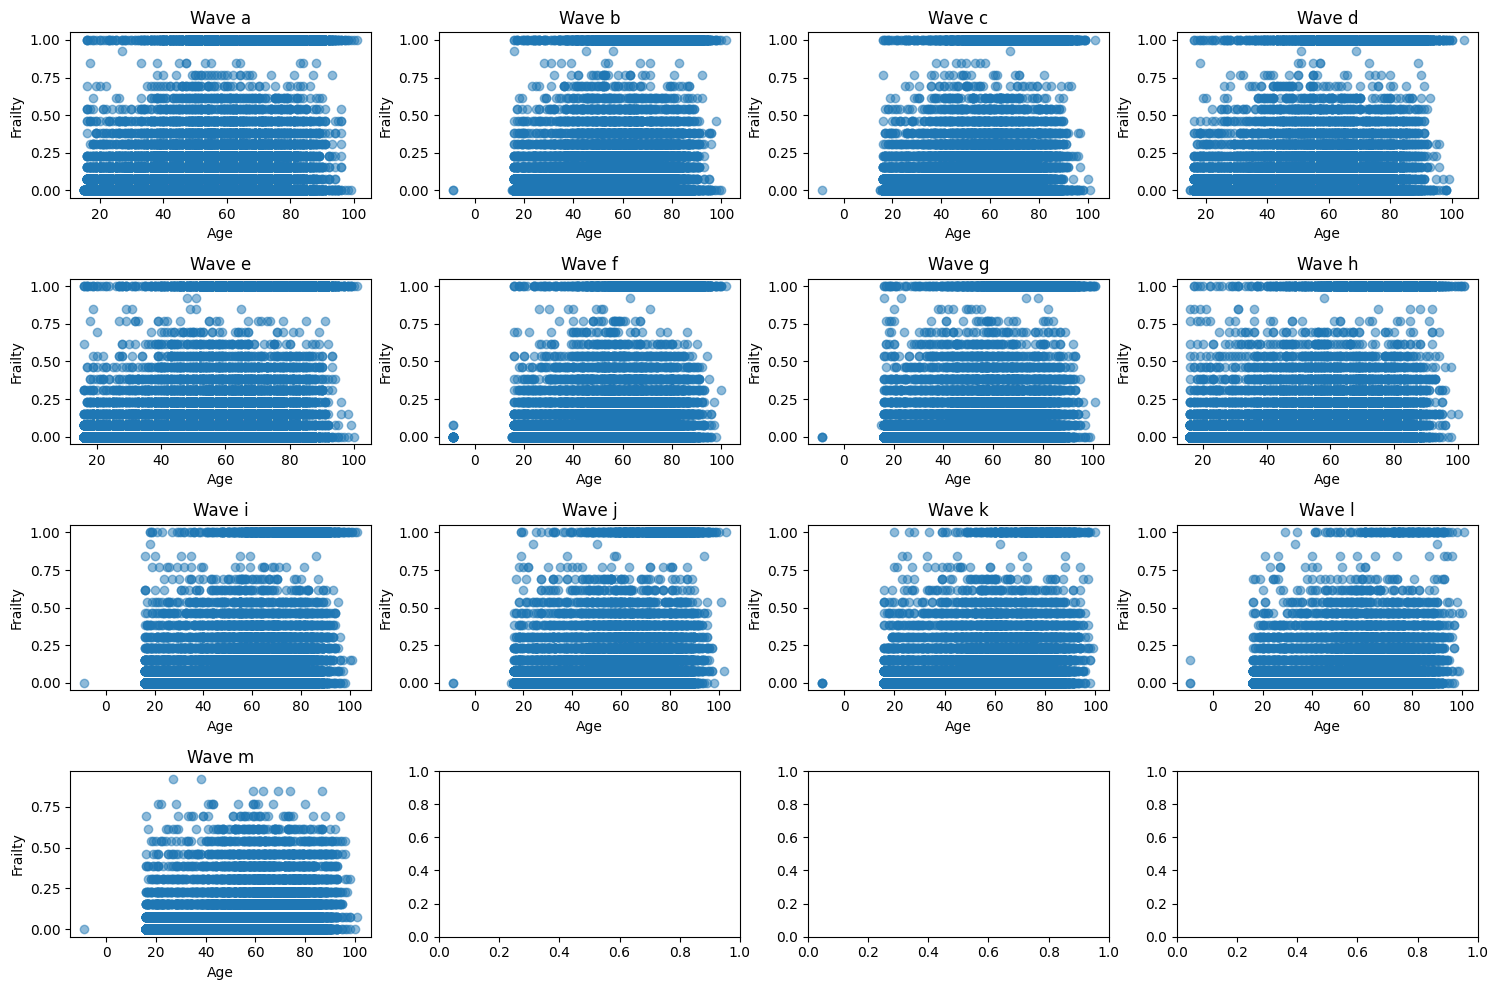

In [44]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot graphs for each wave
for i, wave in enumerate(waves):
    ax = axes[i]
    wave_data = df_long_panel[df_long_panel['wave'] == wave]
    ax.scatter(wave_data['age'], wave_data['frailty'], alpha=0.5)
    ax.set_title(f'Wave {wave}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frailty')

# Adjust layout
plt.tight_layout()
plt.show()